<a href="https://colab.research.google.com/github/19PA1A05A1/VITBML-EDA1/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("BankNote_Authentication.csv")#importing the dataset into readable format.
df.head()#prints the first five rows of the dataset.

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [11]:
df.shape#prints the number of rows and columns in the dataset.

(1372, 5)

In [12]:
df.columns#prints the names of the columns in the dataset.

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [0]:
from sklearn.model_selection import train_test_split#importing the train test split method from scikit learn
from sklearn.linear_model import LogisticRegression#importing the logistic regression function
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,mean_absolute_error,classification_report#importing the errors

In [0]:
#Taking the features
x=df[['variance', 'skewness', 'curtosis', 'entropy']]

In [0]:
#Taking the label
y=df['class']

In [0]:
# splitting our data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [17]:
#Creating a model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#predicting the labels for test data
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [19]:
#comparing actual and predicted labels
cp=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
cp

,Actual,Predicted
263,0,0
313,0,0
318,0,0
915,1,1
13,0,0
...,...,...
283,0,0
1183,1,1
902,1,1
649,0,0


In [20]:

#Accuracy of our model
print(accuracy_score(y_test,y_pred)*100)

98.54545454545455


In [21]:
#Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[154   4]
 [  0 117]]


In [22]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       158
           1       0.97      1.00      0.98       117

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275






*  Here the recall of our model in recognising the fake currency is one 
*Therefore,our model is successfully recognising fake notes 









In [23]:

#roc and auc score
print(roc_auc_score(y_test,y_pred))

0.9873417721518987


In [24]:
#printing the error in the prediction
print(mean_absolute_error(y_test,y_pred))

0.014545454545454545




*   By keeping the random state constant and varying test size,we get different accuracies

*   The best accuracy score we get is 98.5454





In [25]:
#displaying the required values
am=pd.DataFrame({'test_size':[0.2,0.3,0.4],'accuracy_score':[98.5454,99.02912,99.08925],'error':[0.014545,0.0097,0.00910]})
am

,test_size,accuracy_score,error
0,0.2,98.54540,0.014545
1,0.3,99.02912,0.009700
2,0.4,99.08925,0.009100




*   Here accuracy is very high in test sizes of 0.3,0.4.So,this may lead to high variance which we don't what because in future it may not work well on the other data.So we take the test size of 0.2 



##  **Kfold cross validation**

In [0]:
#Creating a model
model=LogisticRegression()

In [0]:
#importing packages
from sklearn.model_selection import KFold,cross_val_score
model=KFold(n_splits=3)

In [28]:
cross_val_score(LogisticRegression(),x,y).mean()*100

98.97969475779695

## **KNN Algorithm**

In [0]:
# importing packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,mean_absolute_error,r2_score,classification_report

In [0]:
#spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)

In [0]:
#giving the value of k
model=KNeighborsClassifier(n_neighbors=10)

In [32]:
#fitting the model
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [33]:
#predicting the values
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [34]:
#data frame of predicted and actual values
sn=pd.DataFrame({'actual':y_test,'predicted':y_pred})
print(sn)

      actual  predicted
199        0          0
696        0          0
45         0          0
738        0          0
792        1          1
...      ...        ...
250        0          0
295        0          0
1283       1          1
1351       1          1
1148       1          1

[549 rows x 2 columns]


<BarContainer object of 549 artists>

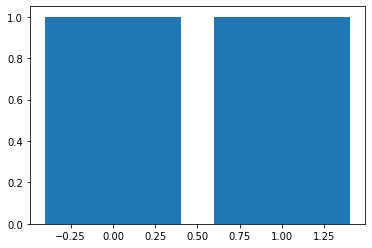

In [35]:
plt.bar(y_test,y_pred)

In [36]:
#accuracy of our model
print(accuracy_score(y_test,y_pred)*100)

98.90710382513662


In [37]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))


[[299   6]
 [  0 244]]


In [38]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       305
           1       0.98      1.00      0.99       244

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



In [39]:
#roc and auc 
print(roc_auc_score(y_test,y_pred))

0.9901639344262295


In [40]:
#error in the predicted values
print(mean_absolute_error(y_test,y_pred))

0.01092896174863388


In [41]:
#dataset of accurcy and error
am=pd.DataFrame({'n_neighbors':[10,20,30],'accuracy_score':[98.90710,98.72495,98.17850],'error':[0.01092,0.01275,0.01821]})
am

,n_neighbors,accuracy_score,error
0,10,98.90710,0.01092
1,20,98.72495,0.01275
2,30,98.17850,0.01821




*   Here we get highest accuracy for k=10.
So we use k=10



## **SVM Algorithm**

In [0]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC

In [0]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:

#fitting the model
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
#predicting the values
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [56]:
#predicted values
sn=pd.DataFrame({'actual':y_test,'predicted':y_pred})
sn

,actual,predicted
199,0,0
696,0,0
45,0,0
738,0,0
792,1,1
...,...,...
1202,1,1
695,0,0
99,0,0
328,0,0


In [57]:
#accuracy of model
print(accuracy_score(y_test,y_pred)*100)

98.9090909090909


In [58]:
#confusion matrix of model
print(confusion_matrix(y_test,y_pred))

[[140   3]
 [  0 132]]


In [59]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       143
           1       0.98      1.00      0.99       132

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [60]:
#roc and auc score
print(roc_auc_score(y_test,y_pred))

0.9895104895104896


In [61]:
#error in the given model
print(mean_absolute_error(y_test,y_pred))

0.01090909090909091


<BarContainer object of 275 artists>

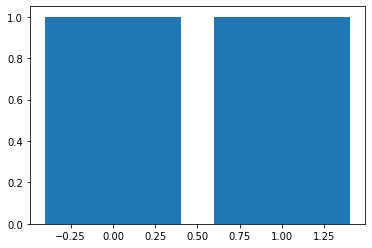

In [63]:
plt.bar(y_test,y_pred)

## **Decision Tree Algorithm**

In [0]:
#importing packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [0]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [0]:
#creating the model
model=tree.DecisionTreeClassifier(max_depth=5)
b=model.fit(x_train,y_train)

In [87]:
#predicting the values
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

[Text(178.56, 199.32, 'X[0] <= 0.32\ngini = 0.494\nsamples = 1372\nvalue = [762, 610]'),
 Text(119.97, 163.07999999999998, 'X[1] <= 7.565\ngini = 0.306\nsamples = 657\nvalue = [124, 533]'),
 Text(83.7, 126.83999999999999, 'X[0] <= -0.403\ngini = 0.131\nsamples = 552\nvalue = [39, 513]'),
 Text(44.64, 90.6, 'X[2] <= 6.219\ngini = 0.07\nsamples = 471\nvalue = [17, 454]'),
 Text(22.32, 54.359999999999985, 'X[1] <= 7.293\ngini = 0.006\nsamples = 324\nvalue = [1, 323]'),
 Text(11.16, 18.119999999999976, 'gini = 0.0\nsamples = 320\nvalue = [0, 320]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'X[1] <= -4.675\ngini = 0.194\nsamples = 147\nvalue = [16, 131]'),
 Text(55.8, 18.119999999999976, 'gini = 0.0\nsamples = 130\nvalue = [0, 130]'),
 Text(78.12, 18.119999999999976, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(122.76, 90.6, 'X[1] <= 5.454\ngini = 0.396\nsamples = 81\nvalue = [22, 59]'),

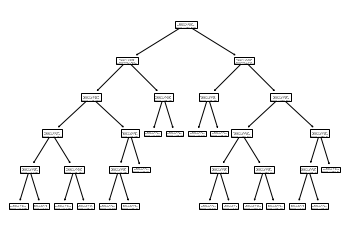

In [88]:
tree.plot_tree(b.fit(x,y))

In [89]:
#data set of actual and predicted values
sn=pd.DataFrame({'actual':y_test,'predicted':y_pred})
sn


,actual,predicted
199,0,0
696,0,0
45,0,0
738,0,0
792,1,1
...,...,...
1202,1,1
695,0,0
99,0,0
328,0,0


In [90]:
#accuracy of model
print(accuracy_score(y_test,y_pred)*100)

97.81818181818181


In [91]:
#confusion of matrix
print(confusion_matrix(y_test,y_pred))


[[139   4]
 [  2 130]]


In [92]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       143
           1       0.97      0.98      0.98       132

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [93]:
#roc and auc 
print(roc_auc_score(y_test,y_pred))

0.9784382284382285


In [94]:
#error in the model
print(mean_absolute_error(y_test,y_pred))

0.02181818181818182


In [96]:
#data frame of accuracy and error
am=pd.DataFrame({'max_depth':[2,4,5],'accuracy_score':[90.54545,97.09090,97.81818],'error':[0.094545,0.029090,0.021818]})
am

,max_depth,accuracy_score,error
0,2,90.54545,0.094545
1,4,97.09090,0.029090
2,5,97.81818,0.021818




*   Here error is very less for maximum
depth 5.So we take it.

In [98]:
# now chossing the best accuracy for the dataset when we performed logistic regression,KNN,svm,decisiontree..
msna=pd.DataFrame({'algorithim':['logistic regression','KNN','SVM','Decision tree'],'accuracy':[98.54545,98.90710,98.90909,97.81818]})
msna

,algorithim,accuracy
0,logistic regression,98.54545
1,KNN,98.90710
2,SVM,98.90909
3,Decision tree,97.81818


### **Conclusion**

Since we get the high accuracy in SVM,it is the best algorithm.

### **Group members**

1. M.Sesha Sai Anjaneya-19pa1a05a1  
2. K.Chiranjeevi-19pa1a0584

1. M.V.V.S.S.Vara Prasad-19pa1a0595
2. M.Sai Kiran-19pa1a0597



**